In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the dataset from the url
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
data.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
41896,PAN,North America,Panama,2020-07-01,34463.0,913.0,919.000,645.0,14.0,14.000,...,22267.037,2.2,128.346,8.33,2.4,9.9,NaN,2.30,78.51,0.789
33249,MAR,Africa,Morocco,2020-11-20,316260.0,4706.0,4846.286,5182.0,92.0,78.714,...,7485.013,1.0,419.146,7.14,0.8,47.1,NaN,1.10,76.68,0.667
4685,BFA,Africa,Burkina Faso,2020-11-20,2686.0,0.0,11.000,68.0,0.0,0.000,...,1703.102,43.7,269.048,2.42,1.6,23.9,11.877,0.40,61.58,0.423
1690,ARG,South America,Argentina,2020-05-26,13228.0,600.0,631.286,484.0,17.0,13.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.825
52568,TJK,Asia,Tajikistan,2020-07-10,6457.0,47.0,57.000,55.0,1.0,0.429,...,2896.913,4.8,427.698,7.11,NaN,NaN,72.704,4.80,71.10,0.650
19195,GBR,Europe,United Kingdom,2020-04-30,178771.0,4964.0,4580.429,26754.0,636.0,699.857,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
19445,GEO,Asia,Georgia,2020-02-27,1.0,0.0,0.143,NaN,0.0,0.000,...,9745.079,4.2,496.218,7.11,5.3,55.5,NaN,2.60,73.77,0.780
18569,FRA,Europe,France,2020-04-30,167299.0,756.0,1285.143,24379.0,289.0,360.143,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
16949,ESP,Europe,Spain,2020-03-06,400.0,141.0,52.571,5.0,2.0,0.714,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
43592,PRT,Europe,Portugal,2020-11-09,183420.0,4096.0,5224.714,2959.0,63.0,52.714,...,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.847


In [3]:
#show the column names of the dataset
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [4]:
#determine the number of rows and columns
data.shape

(59921, 50)

In [5]:
#convert 'date' column from object type to datetime type
data["date"]= pd.to_datetime(data["date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59921 entries, 0 to 59920
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   iso_code                            59608 non-null  object        
 1   continent                           59294 non-null  object        
 2   location                            59921 non-null  object        
 3   date                                59921 non-null  datetime64[ns]
 4   total_cases                         51168 non-null  float64       
 5   new_cases                           59784 non-null  float64       
 6   new_cases_smoothed                  58828 non-null  float64       
 7   total_deaths                        43356 non-null  float64       
 8   new_deaths                          59784 non-null  float64       
 9   new_deaths_smoothed                 58828 non-null  float64       
 10  total_cases_per_millio

In [6]:
pd.set_option('display.max_rows', None)
#arrange the countries by hdi, to determine what countries to compare USA with
dt = data.groupby("location").agg({"human_development_index":"mean"})
dt.sort_values(by = "human_development_index", ascending = False, inplace = True)
dt

,human_development_index
location,
Norway,0.953
Switzerland,0.944
Australia,0.939
Ireland,0.938
Germany,0.936
Iceland,0.935
Hong Kong,0.933
Sweden,0.933
Singapore,0.932


In [7]:
#select the subset of the data based on the countries chosen
df = data[data["location"].isin(['Sweden','Singapore','Netherlands','Denmark','Canada','United States','United Kingdom',
                                'Finland','New Zealand','Belgium'])]
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
3757,BEL,Europe,Belgium,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.916
3758,BEL,Europe,Belgium,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.916
3759,BEL,Europe,Belgium,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,...,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.916
3760,BEL,Europe,Belgium,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,...,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.916
3761,BEL,Europe,Belgium,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,...,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.916


In [8]:
df.shape

(3132, 50)

In [9]:
#show missing values
df.isnull().sum()

iso_code                                 0
continent                                0
location                                 0
date                                     0
total_cases                            145
new_cases                                2
new_cases_smoothed                      52
total_deaths                           499
new_deaths                               2
new_deaths_smoothed                     52
total_cases_per_million                145
new_cases_per_million                    2
new_cases_smoothed_per_million          52
total_deaths_per_million               499
new_deaths_per_million                   2
new_deaths_smoothed_per_million         52
reproduction_rate                      562
icu_patients                          1740
icu_patients_per_million              1740
hosp_patients                         1994
hosp_patients_per_million             1994
weekly_icu_admissions                 3013
weekly_icu_admissions_per_million     3013
weekly_hosp

In [10]:
df.drop(['handwashing_facilities','icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million',
         'weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions',
         'weekly_hosp_admissions_per_million','new_tests','new_tests_per_thousand','new_tests_smoothed',
         'new_tests_smoothed_per_thousand'], axis=1, inplace = True)

C:\Users\Sumayyah Musa\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
df.shape

(3132, 37)

<AxesSubplot:>

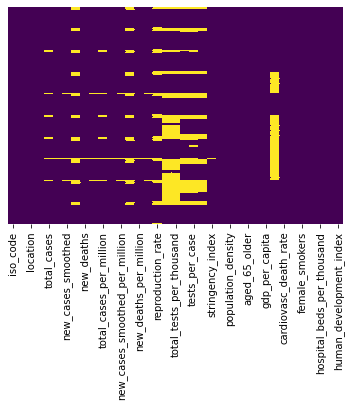

In [12]:
#heatmap to check for missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
#fill all mssing values with zero
df.fillna(0, inplace = True)

C:\Users\Sumayyah Musa\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 3757 to 55850
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         3132 non-null   object        
 1   continent                        3132 non-null   object        
 2   location                         3132 non-null   object        
 3   date                             3132 non-null   datetime64[ns]
 4   total_cases                      3132 non-null   float64       
 5   new_cases                        3132 non-null   float64       
 6   new_cases_smoothed               3132 non-null   float64       
 7   total_deaths                     3132 non-null   float64       
 8   new_deaths                       3132 non-null   float64       
 9   new_deaths_smoothed              3132 non-null   float64       
 10  total_cases_per_million          3132 non-null   float64

In [20]:
df.shape

(3132, 37)

In [15]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,3.132000e+03,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,...,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,4.608724e+05,5451.82152,5272.219767,17198.230843,119.031290,117.302654,5147.156943,66.691406,64.965671,241.615201,...,11.356658,48494.481258,0.280204,122.649050,6.806679,17.699521,23.038633,2.977816,81.803215,0.924997
std,1.615466e+06,18411.30261,17626.787622,44709.244767,336.808091,321.418952,7494.884308,149.681145,136.168997,289.022766,...,1.922265,13257.493667,0.357568,18.555737,2.359698,5.550808,4.814838,0.950171,1.221815,0.005883
min,0.000000e+00,-5.00000,0.000000,0.000000,-117.000000,-14.429000,0.000000,-0.902000,0.000000,0.000000,...,7.049000,36085.843000,0.000000,92.243000,4.280000,5.200000,16.600000,2.220000,78.860000,0.916000
25%,1.814000e+03,8.00000,10.321750,22.000000,0.000000,0.000000,322.672000,1.244000,1.539500,4.444000,...,9.732000,40585.721000,0.000000,109.361000,4.790000,14.800000,18.800000,2.500000,81.320000,0.920000
50%,3.828300e+04,220.00000,237.571500,624.000000,2.000000,2.571000,2739.378000,16.896000,17.833500,103.156000,...,11.881000,45350.053000,0.200000,122.137000,6.410000,18.950000,23.600000,2.610000,82.095000,0.924000
75%,1.108125e+05,1167.00000,1118.428250,9099.750000,39.000000,38.250000,6780.074250,66.305750,64.479500,441.273250,...,12.849000,48472.545000,0.500000,133.982000,8.080000,20.000000,27.300000,3.280000,82.430000,0.931000
max,1.354122e+07,205557.00000,175809.571000,268045.000000,2603.000000,2240.857000,49815.714000,2064.003000,1536.030000,1436.199000,...,13.433000,85535.383000,1.200000,153.507000,10.990000,25.100000,31.400000,5.640000,83.620000,0.933000


In [18]:
fig2 = px.line(df, x="date", y="total_cases_per_million", color='location')
fig2.show()
fig2.write_html("date_vs_cases.html",include_plotlyjs = False)

In [28]:
fig3 = px.line(df, x="total_cases_per_million", y="total_deaths_per_million", color='location')
fig3.show()
fig3.write_html("case_fatality_rate.html",include_plotlyjs = False)

In [33]:
fig4 = px.line(df, x="total_deaths_per_million", y = "total_tests_per_thousand", color='location')
fig4.show()
fig4.write_html("deaths_vs_tests.html",include_plotlyjs = False)

In [34]:
fig2 = px.line(df, x="date", y="reproduction_rate", color='location')
fig2.show()
fig2.write_html("date_vs_cases.html",include_plotlyjs = False)

In [ ]:
fig5 = px.pie(df, values="total_deaths_per_million", names='location')
fig5.show()
fig5.write_html("location_vs_deaths.html",include_plotlyjs = False)

In [ ]:
#export the filtered data to csv for use in d3js
df.to_csv('covid-data.csv')